## Magnetic Encoder Analysis

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

# directory where the received binary files are
DIR = "./files/"

### Select File by uncommenting

In [2]:
data_filename = "capture_10_1.bin"
data_filename = "capture_25_1.bin"
data_filename = "capture_50_1.bin"
data_filename = "capture_82_1.bin"
#data_filename = "capture_100_1.bin"

data_fulfilename = DIR + data_filename

Analysis

In [3]:
with open(data_fulfilename,"rb") as f:
    raw = f.read()

# each data is taken every 250 us
data = []

numdata = len(raw)
print("Number of samples", numdata)


Number of samples 1405964


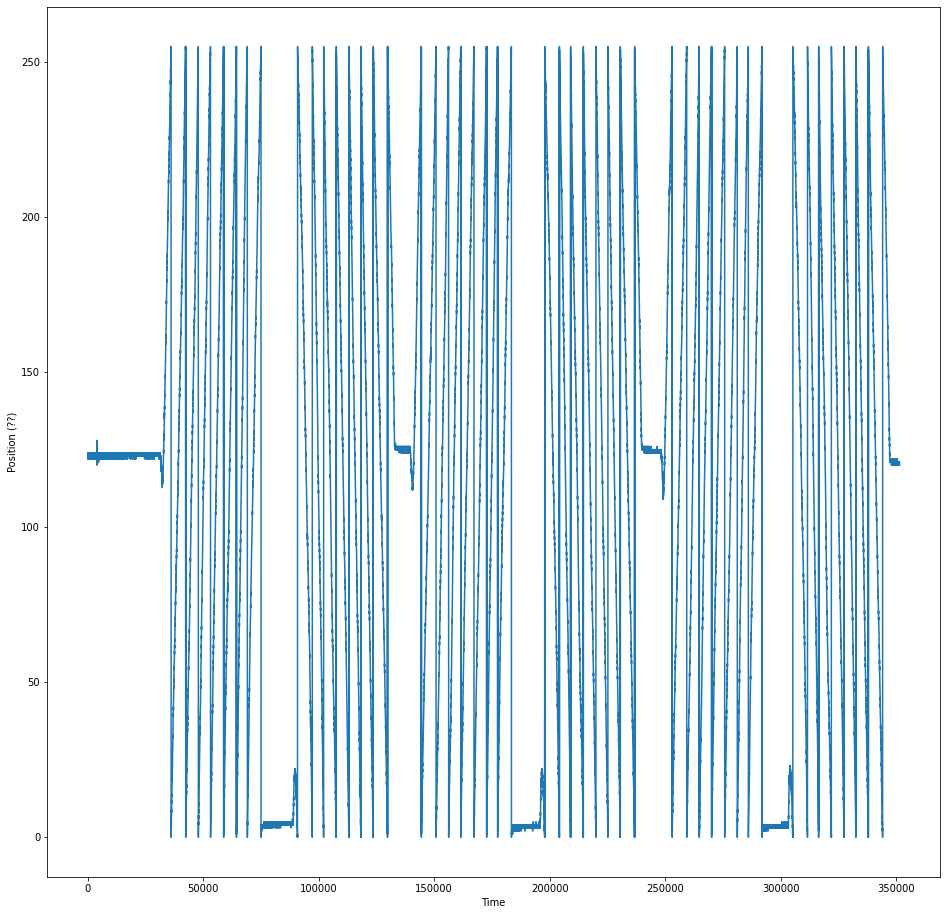

In [7]:
for data_i in range(numdata):
    data.append(raw[data_i])
    
# do the median filter
window = 9
# take window an odd value, same number of data in each side
if window % 2 == 0:
    window + 1
    
#print(window)

side_window = int(window/2)
#print(side_window) # the pixels at each side

filter_data = []
time = [] # although we are filtering, it is ok to start at zero

primer = 1
base = 0
for index, data_i in enumerate(data):
    # example window=9, side_window=4
    #         numdata=20 (0 to 19)
    # when the index is 4 or larger, it has 4 data on the left: 0,1,2,3
    # or when the index is 15 < numdata-side_window)
    
    if index >= side_window and index < numdata-side_window:
        data_window = data[index-side_window:index+side_window+1]
        
        filter_data.append(int(np.median(data_window)))
        time.append(0.25 * (index-side_window))
        if primer==1:
            #print(data_window)
            primer = 0


            
plt.figure(figsize=(16,16))
plt.plot(time, filter_data)
plt.xlabel('Time')
plt.ylabel('Position (??)')
plt.show()

            
#filter_data

In [5]:
lista = [0,1,2,3,4,5,6,7,8,9]
lista[0:2]

[0, 1]